In [2]:
%load_ext autoreload
%autoreload 2

# Water Pump Replacement Strategy

This notebook contain for the formulation of non function water pump replacement strategy  

In [ ]:
# load and preprocess data containing training and test data
import pandas as pd
from src.preprocess import preprocess_data
import numpy as np

raw_df = pd.read_csv("data/combined_data.csv", index_col="id")
df = preprocess_data(raw_df)

/home/afaq/personal_code/machinelearning/tanzania_water_pump/src/preprocess.py:76: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  public_meeting=df.public_meeting.fillna(False).astype(int),
/home/afaq/personal_code/machinelearning/tanzania_water_pump/src/preprocess.py:77: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  permit=df.permit.fillna(False).astype(int),
/home/afaq/personal_code/machinelearning/tanzania_water_pump/src/preprocess.py:83: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain t

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(
    style="ticks",
    context="paper",
    palette="Greens",
    rc={"axes.spines.right": False, "axes.spines.top": False},
)

<Axes: xlabel='population', ylabel='extraction_type_class'>

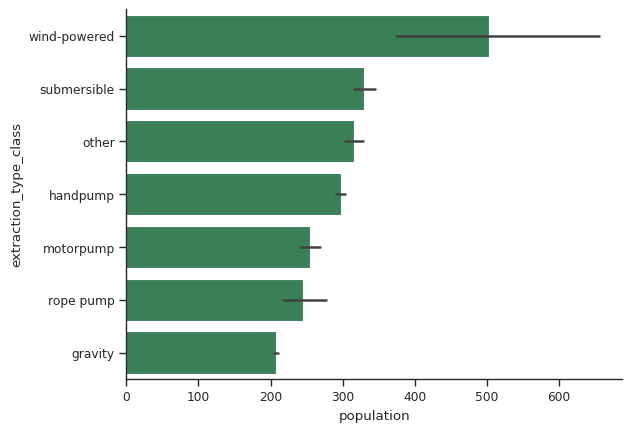

In [ ]:
# type of water pumps serving average population
sns.barplot(
    x="population",
    y="extraction_type_class",
    data=df,
    order=df.groupby("extraction_type_class")["population"]
    .mean()
    .sort_values(ascending=False)
    .index,
    color="seagreen",
)

In [7]:
palette = ["#0BDA51", "#F72585", "#98FB98"]

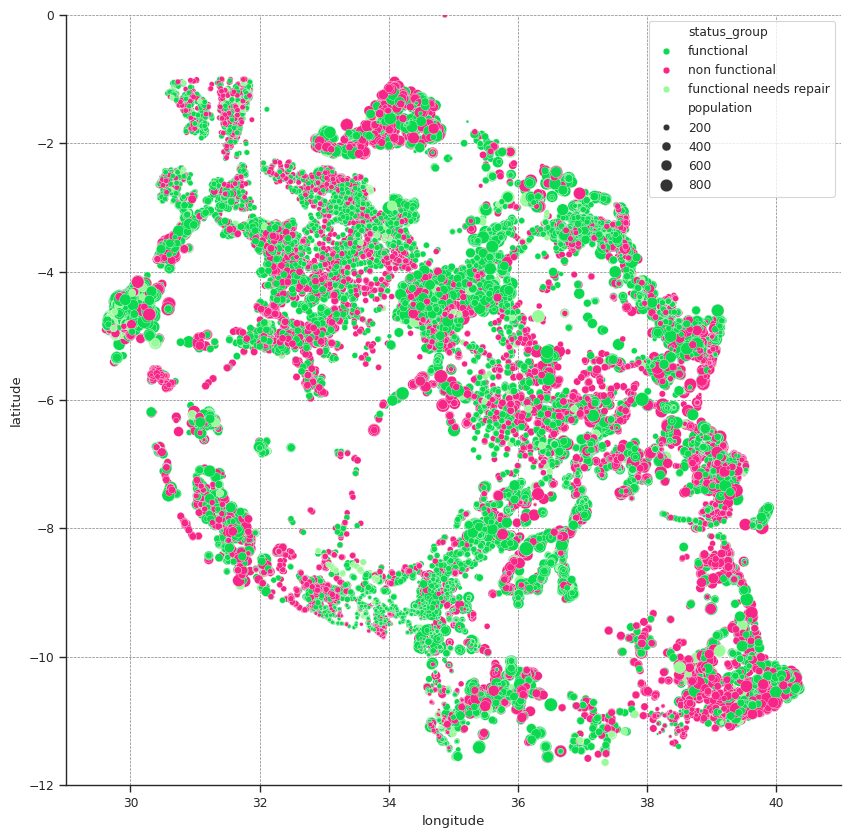

In [ ]:
# function vs non functional water pumps
from seaborn import color_palette

plot_df = df[(df["population"] > 0) & (df["population"] < 1000)]

fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(
    x=plot_df["longitude"],
    y=plot_df["latitude"],
    hue=plot_df["status_group"],
    size=plot_df["population"],
    ax=ax,
    palette=palette,
    sizes=(2, 100),
)
ax.set_xlim(29, 41)
ax.set_ylim(-12, 0)
plt.grid(color="gray", linestyle="--", linewidth=0.5)
# ax.set_xticks([])
# ax.set_yticks([])

# Action Plan: Initial Replacement

### Criteria
- **Population Threshold**: Replace water pumps that serve a population greater than 1,000.

### Impact Summary
- **Total Pumps Replaced**: 748 pumps
- **Population Impacted**: 1,479,296 people

This targeted replacement strategy ensures that communities with the highest populations receive functional water pumps first, maximizing the immediate impact of the replacement effort.


Text(3, 200, 'Total Water Pumps: 748')

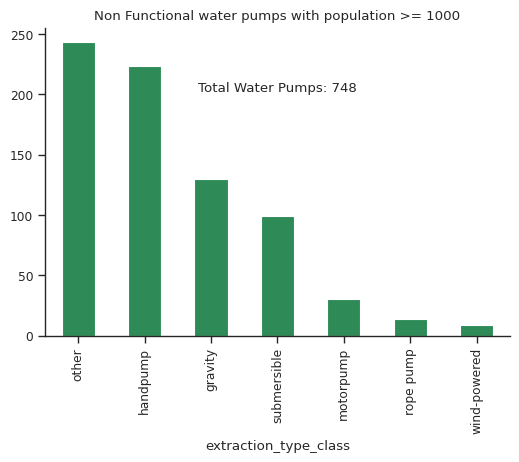

In [116]:
fig, ax = plt.subplots(figsize=(6, 4))
df[
    (df["population"] >= 1000) & (df["status_group"] == "non functional")
].extraction_type_class.value_counts().plot(
    kind="bar",
    color="seagreen",
    title="Non Functional water pumps with population >= 1000",
)
total = df[(df["population"] >= 1000) & (df["status_group"] == "non functional")].shape[
    0
]
ax.text(3, 200, "Total Water Pumps: " + str(total), ha="center", va="bottom")

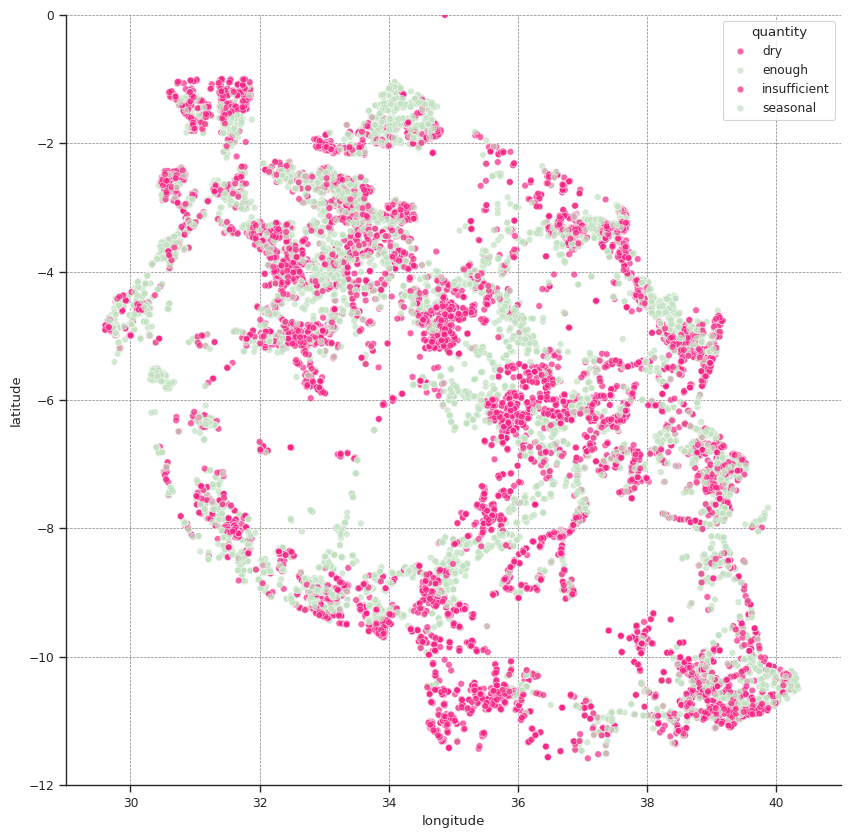

In [31]:
# water quantity vs non functional water pumps
from seaborn import color_palette

plot_df = df[(df["status_group"] == "non functional")]

fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(
    x=plot_df["longitude"],
    y=plot_df["latitude"],
    hue=plot_df["quantity"],
    ax=ax,
    palette=["#F72585", "#C1E1C1", "#F72585", "#C1E1C1"],
    alpha=0.7,
)
ax.set_xlim(29, 41)
ax.set_ylim(-12, 0)
plt.grid(color="gray", linestyle="--", linewidth=0.5)

In [ ]:
# continue analysis for the rest of the water pumps

df = df[df["population"] < 1000]

## Replacement Centers 
Replacement centers will be established in major cities due to the availability of parts and labor. All replacement activities will be conducted on a regional basis. 

Here we are determining the cost of replacing the pumps, as well as the travel time and associated costs from the water pump location to the replacement center.



In [118]:
major_cities = pd.DataFrame(
    {
        "Dar es Salaam, Dar es Salaam Region": [-6.823, 39.27],
        "Mwanza, Mwanza": [-2.517, 32.9],
        "Arusha, Arusha": [-3.367, 36.683],
        "Mbeya, Mbeya": [-8.9, 33.45],
        "Morogoro, Morogoro": [-6.821, 37.661],
        "Zanzibar, Zanzibar Urban/West": [-6.164, 39.198],
        "Tanga, Tanga": [-5.069, 39.099],
        "Tabora, Tabora": [-5.016, 32.827],
        "Sumbawanga, Rukwa": [-7.967, 31.617],
        "Songea, Ruvuma": [-10.683, 35.65],
        "Singida, Singida": [-4.816, 34.744],
        "Kigoma, Kigoma": [-4.877, 29.627],
    }
).T.rename(columns={0: "latitude", 1: "longitude"})
major_cities["city"] = major_cities.index

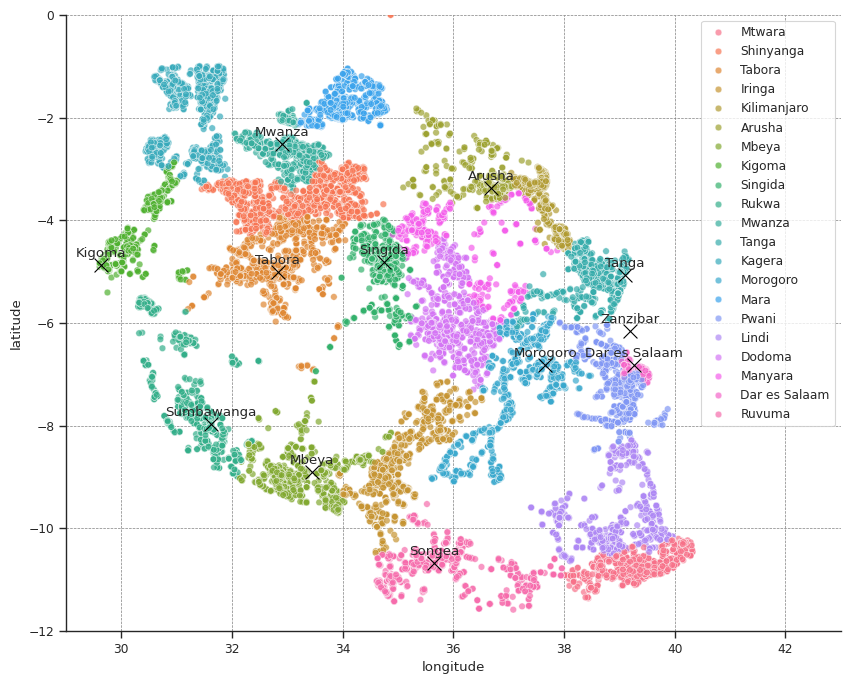

In [119]:
plot_df = df[(df["status_group"] == "non functional")]

fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(
    x=plot_df["longitude"],
    y=plot_df["latitude"],
    hue=plot_df["region"],
    ax=ax,
    # palette=["#F72585", "#C1E1C1", "#F72585", "#C1E1C1"],
    alpha=0.7,
)

sns.scatterplot(
    x=major_cities["longitude"],
    y=major_cities["latitude"],
    ax=ax,
    color="black",
    marker="x",
    s=100,
)
for i in range(major_cities.shape[0]):
    ax.text(
        major_cities.iloc[i]["longitude"],
        major_cities.iloc[i]["latitude"] + 0.1,
        major_cities.iloc[i]["city"].split(",")[0],
        ha="center",
        va="bottom",
    )
ax.set_xlim(29, 43)
ax.set_ylim(-12, 0)
plt.grid(color="gray", linestyle="--", linewidth=0.5)

In [120]:
df.extraction_type_class.value_counts()

extraction_type_class
gravity         32754
handpump        19817
other            7767
submersible      7413
motorpump        3693
rope pump         539
wind-powered      132
Name: count, dtype: int64

## Pump Replacement Strategy
- High Replacement Costs: Due to the high replacement costs associated with wind turbines, these will be replaced with submersible water pumps.
- Upgrading to Submersible Pumps: Rope pumps, hand pumps, and gravity-fed pumps will also be upgraded to submersible water pumps to improve efficiency and reduce maintenance requirements.

Note: For simplicity, all existing pump types will be replaced with submersible water pumps.

## Regional Ranking of Number of non functional pumps

In [121]:
unserved_population = df[df["status_group"] == "non functional"]["population"].sum()
print(f"Population currently effected by water pump failure: {unserved_population}")

Population currently effected by water pump failure: 5921624


In [122]:
percentage_of_population = unserved_population / 69203742 * 100
print(f"% of total Tanzanian population effected: {percentage_of_population}")

% of total Tanzanian population effected: 8.5567974055507


# Replacement Strategy 1: Prioritization by Population Impact

In this replacement strategy, all non-functional water pumps within each region are ranked based on the population impacted per pump. Replacements will occur in descending order, prioritizing pumps that serve the largest population first to maximize the benefit of each replacement.

**Steps**:
1. **Rank Pumps**: Sort all non-functional pumps within each region by the population impacted, from highest to lowest.
2. **Replace in Order**: Begin replacements with the pumps that impact the most people, proceeding down the list.

This approach ensures that communities with the greatest need receive functional pumps first.



In [123]:
region_ranking = {}
for key, val in df[(df["status_group"] == "non functional")].groupby("region")[
    "population"
]:
    region_ranking[key] = val.sort_values(ascending=False)

In [124]:
plan = pd.DataFrame(
    {key: val.sum() for key, val in region_ranking.items()}, index=[0]
).T.rename(columns={0: "population_unserved"})

replacement = pd.DataFrame(
    {
        # "Replacement "
        # + str(int(perc * 100))
        # + "%"
        perc
        * 100: [
            round((val.iloc[: int(len(val) * perc)].sum() / val.sum()) * 100, 1)
            for key, val in region_ranking.items()
        ]
        for perc in [0.05, 0.10, 0.25, 0.5, 0.75, 0.9]
    },
    index=plan.index,
)
plan = pd.concat([plan, replacement], axis=1)
print("% ppopulation served by replacing top 25% of water pumps")
plan["region"] = plan.index
plan.sort_values(25, ascending=False)

% ppopulation served by replacing top 25% of water pumps


,population_unserved,5.0,10.0,25.0,50.0,75.0,90.0,region
Iringa,181657,20.8,33.9,54.4,82.1,94.1,98.5,Iringa
Pwani,264760,16.1,28.1,53.4,77.4,94.4,98.8,Pwani
Tanga,261429,16.6,28.4,50.9,73.4,92.2,98.2,Tanga
Dar es Salaam,88488,16.5,27.3,48.6,76.2,92.0,98.1,Dar es Salaam
Ruvuma,263587,15.5,26.3,47.6,78.1,94.2,98.1,Ruvuma
Morogoro,465846,14.8,25.3,46.7,73.3,91.4,98.0,Morogoro
Rukwa,269149,14.9,25.1,45.8,72.6,90.8,98.1,Rukwa
Singida,261551,14.6,24.9,45.5,67.0,84.8,95.4,Singida
Manyara,146391,14.4,24.6,44.4,68.5,86.6,95.9,Manyara
Arusha,200818,14.3,23.6,44.3,68.0,86.8,95.8,Arusha


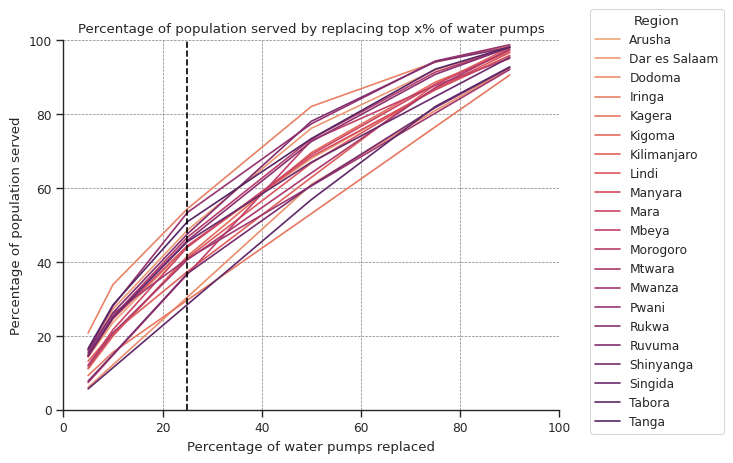

In [125]:
plot_df = pd.melt(
    plan,
    id_vars=["region", "population_unserved"],
    var_name="strategy",
    value_name="percentage",
)

sns.lineplot(
    x="strategy",
    y="percentage",
    hue="region",
    data=plot_df,
    palette="flare",
    markers=True,
)
plt.grid(color="gray", linestyle="--", linewidth=0.5)
plt.ylim(0, 100)
plt.xlim(0, 100)
plt.vlines(25, 0, 100, linestyles="--", color="black")
plt.title("Percentage of population served by replacing top x% of water pumps")
plt.ylabel("Percentage of population served")
plt.xlabel("Percentage of water pumps replaced")
plt.legend(title="Region", bbox_to_anchor=(1.05, 1.1), loc="upper left")

# Replacement Strategy 2: Prioritization by Population Impact vs Time and Cost

## Cost Analysis

### Submersible Pump Cost
- The average cost of a 1.5 HP submersible pump, capable of serving approximately 300 people, is **USD 300**.

### Total Replacement Cost
The total replacement cost includes both the cost of the pump and an additional 25% for labor and installation.

$$
\text{Total Replacement Cost} = (\text{Pump Cost} \times \frac{\text{Population}}{300}) + (\text{Pump Cost} \times \frac{\text{Population}}{300} \times 0.25)
$$

Where:
- **Pump Cost** = USD 300
- **Population** = the number of people served by the pump.

### Average Replacement Time
Each replacement takes an estimated **4 to 6 hours** for installation plus an **average travel time of 2 hours**, resulting in a rate of approximately **1 replacement per day**.

### Distance to Major Cities

1. **Calculate Distance to Each Major City**: For each major city, calculate the distance from each entry in `df` to the city. Store these distances in new columns named `distance_to_<city>`, where `<city>` is the name of each major city.

2. **Identify Closest City and Minimum Distance**:
    - **Closest Major City**: Create a new column, `closest_major_city`, to store the name of the closest major city for each entry.
    - **Minimum Distance**: Create a column, `min_distance`, that holds the minimum distance to any major city.

3. **Calculate Travel Time**: Calculate the approximate travel time to the closest major city, assuming an average speed of 50 km/h. Store this in a new column, `travel_time`, using the formula:

This approach provides insights into proximity and travel times to major cities, which can be valuable for further analysis and decision-making.


In [127]:
from src.preprocess import distance

df = df.assign(
    replacement_cost=lambda x: np.where(
        x["status_group"] == "non functional",
        np.where(
            x.population > 300,
            (300 * (x.population / 300)) + (300 * (x.population / 300) * 0.25),
            375,
        ),
        0,
    )
)

for city, lat_long in major_cities.iterrows():
    df["distance_to_" + city] = distance(
        df, lat_long["latitude"], lat_long["longitude"]
    )
df = (
    df.assign(
        closet_major_city=lambda x: x.filter(like="distance_to_")
        .idxmin(axis=1)
        .str.replace("distance_to_", "")
    )
    .assign(min_distance=lambda x: x.filter(like="distance_to_").min(axis=1))
    .drop(columns=df.filter(like="distance_to_").columns)
    .assign(travel_time=lambda x: x["min_distance"] / 50)
)

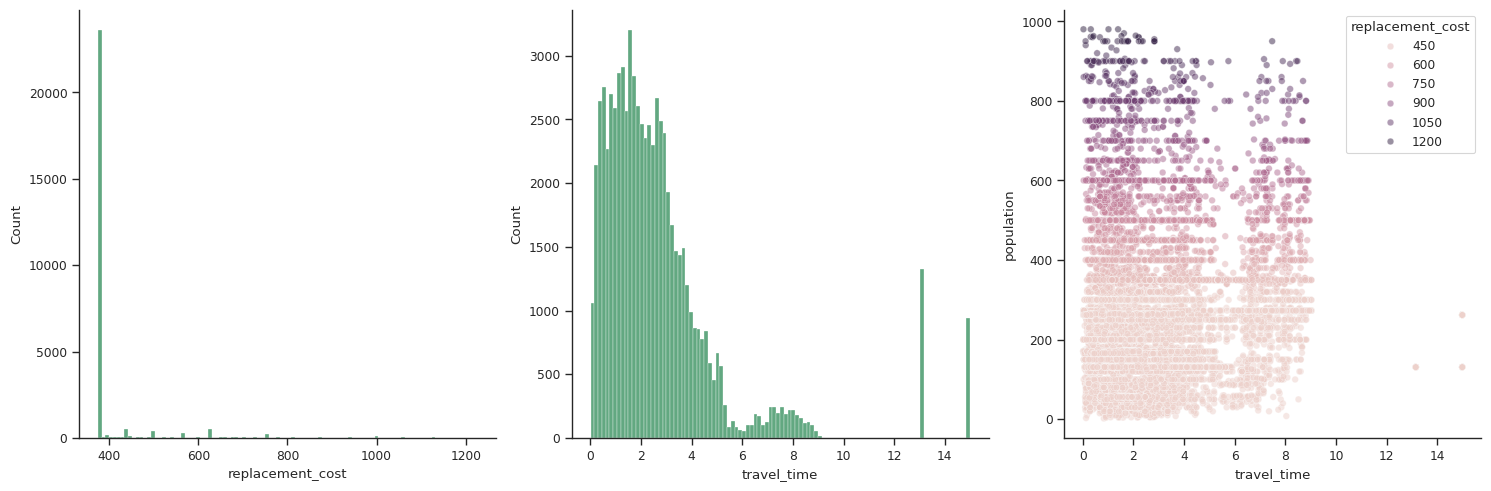

In [128]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(
    df.loc[df.status_group == "non functional", "replacement_cost"],
    bins=100,
    ax=ax[0],
    color="seagreen",
)
sns.histplot(df["travel_time"], bins=100, ax=ax[1], color="seagreen")
sns.scatterplot(
    x="travel_time",
    y="population",
    data=df[df["status_group"] == "non functional"],
    alpha=0.5,
    hue="replacement_cost",
    ax=ax[2],
    # palette=["#0BDA51", "#F72585", "#98FB98"],
)
plt.tight_layout()
# ax.set_xlim(250, 2000)

## Weighted Scoring System for Selecting Water Pump Candidates for Replacement

To prioritize water pump replacements, we calculate a weighted score for each candidate. This score allows us to target pumps that serve the highest impacted populations while minimizing replacement costs and travel time.

### Scoring Methodology
1. **Normalization**: Normalize each component (population impacted, replacement cost, and travel time) to bring all values onto a comparable scale.
   
2. **Weighted Score Calculation**:
   - Assign weights to each component based on their importance: 
      - \( w_1 \): Weight for population impacted
      - \( w_2 \): Weight for replacement cost
      - \( w_3 \): Weight for travel time
   - Calculate the score using the formula:
   
$$
\text{Score} = (w1 \times \text{normalized population}) + (w2 \times \text{normalized replacement cost}) + (w3 \times \text{normalized travel time})
$$

3. **Replacement Prioritization**: Pumps with the highest scores are prioritized for replacement, as they represent the greatest potential impact in terms of population served and cost-efficiency.

### Objective
This scoring approach ensures that replacement efforts are directed towards the pumps that maximize impact while considering logistical constraints such as travel time and cost.


In [188]:
def min_max_normalize(_df: pd.DataFrame, col: str) -> pd.DataFrame:
    """
    This script normalizes the columns "population", "replacement_cost", and "travel_time" within each region of the DataFrame `_df`.
    The normalization is performed using min-max scaling, which scales the values to a range of [0, 1].

    Columns to normalize:
    - "population"
    - "replacement_cost"
    - "travel_time"

    For each region in the "region" column of the DataFrame:
    - The "population" column is normalized and stored in "population_weighted".
    - The "replacement_cost" column is normalized and stored in "replacement_cost_weighted".
    - The "travel_time" column is normalized and stored in "travel_time_weighted".

    Normalization formula:
        normalized_value = (value - min_value) / (max_value - min_value)

    Parameters:
    - _df (pd.DataFrame): The input DataFrame containing the data to be normalized.
    - col (str): The column to normalize

    Returns:
    - None: The DataFrame `_df` is modified in place with the new normalized columns.
    """
    for key, val in _df.groupby("region"):
        _df.loc[val.index, col + "_weighted"] = (val[col] - val[col].min()) / (
            val[col].max() - val[col].min()
        )
    return _df

In [ ]:
for col in ["population", "replacement_cost", "travel_time"]:
    df = min_max_normalize(df, col)

: 

In [ ]:
def score(_df: pd.DataFrame, w1=1.0, w2=-0.25, w3=-0.75) -> pd.DataFrame:
    """
    This script calculates the score for each water pump in the DataFrame `_df`.
    The score is calculated using the following formula:

    score = population_weighted * (w1) + replacement_cost_weighted * (w2) + travel_time_weighted * (w3)

    The score is stored in the "score" column of the DataFrame.

    Parameters:
    - _df (pd.DataFrame): The input DataFrame containing the data to be scored.

    Returns:
    - pd.DataFrame: A new DataFrame with the "score" column added.
    """
    return df.assign(
        score=df.population_weighted * w1
        + df.replacement_cost * w2
        + df.travel_time_weighted * w3
    )


df = score(df)

In [132]:
sorted_df = df[df["status_group"] == "non functional"].sort_values(
    by=["region", "score"], ascending=[True, False]
)[
    [
        "region",
        "score",
        "population",
        "replacement_cost",
        "travel_time",
        "status_group",
        "latitude",
        "longitude",
    ]
]
sorted_df.assign(coverage=lambda x: x["population"] / unserved_population * 100)

,region,score,population,replacement_cost,travel_time,status_group,latitude,longitude,coverage
id,,,,,,,,,
24177,Arusha,-93.460368,300,375.0,0.065709,non functional,-3.344786,36.702516,0.005066
9666,Arusha,-93.473302,300,375.0,0.144205,non functional,-3.307242,36.657784,0.005066
41027,Arusha,-93.474341,300,375.0,0.150514,non functional,-3.303260,36.660206,0.005066
54989,Arusha,-93.474853,300,375.0,0.153619,non functional,-3.303177,36.656531,0.005066
15893,Arusha,-93.500349,300,375.0,0.308357,non functional,-3.464983,36.781281,0.005066
...,...,...,...,...,...,...,...,...,...
42696,Tanga,-280.512283,900,1125.0,0.911687,non functional,-5.127567,38.691643,0.015199
43364,Tanga,-280.570393,900,1125.0,1.175201,non functional,-5.749099,38.868949,0.015199
12903,Tanga,-280.589237,900,1125.0,1.260656,non functional,-4.834836,38.580824,0.015199


In [139]:
# Define replacement percentages
replacement_percentages = [0.25, 0.5, 0.75, 1.0]

# Add replacement columns to `sorted_df`
for perc in reversed(replacement_percentages):
    label = f"Replacement {int(perc * 100)}%"
    for key, val in sorted_df.groupby("region"):
        _index = val.index[: int(len(val) * perc)]
        sorted_df.loc[_index, "label"] = label

# Display the modified DataFrame
sorted_df.groupby(["region", "label"]).replacement_cost.sum()

region         label           
Arusha         Replacement 100%    117981.25
               Replacement 25%      96375.00
               Replacement 50%      96750.00
               Replacement 75%      96375.00
Dar es Salaam  Replacement 100%     55330.00
                                     ...    
Tabora         Replacement 75%     125625.00
Tanga          Replacement 100%    169052.50
               Replacement 25%     113625.00
               Replacement 50%     113625.00
               Replacement 75%     113625.00
Name: replacement_cost, Length: 84, dtype: float64

In [140]:
sorted_df

,region,score,population,replacement_cost,travel_time,status_group,latitude,longitude,label
id,,,,,,,,,
24177,Arusha,-93.460368,300,375.0,0.065709,non functional,-3.344786,36.702516,Replacement 25%
9666,Arusha,-93.473302,300,375.0,0.144205,non functional,-3.307242,36.657784,Replacement 25%
41027,Arusha,-93.474341,300,375.0,0.150514,non functional,-3.303260,36.660206,Replacement 25%
54989,Arusha,-93.474853,300,375.0,0.153619,non functional,-3.303177,36.656531,Replacement 25%
15893,Arusha,-93.500349,300,375.0,0.308357,non functional,-3.464983,36.781281,Replacement 25%
...,...,...,...,...,...,...,...,...,...
42696,Tanga,-280.512283,900,1125.0,0.911687,non functional,-5.127567,38.691643,Replacement 100%
43364,Tanga,-280.570393,900,1125.0,1.175201,non functional,-5.749099,38.868949,Replacement 100%
12903,Tanga,-280.589237,900,1125.0,1.260656,non functional,-4.834836,38.580824,Replacement 100%


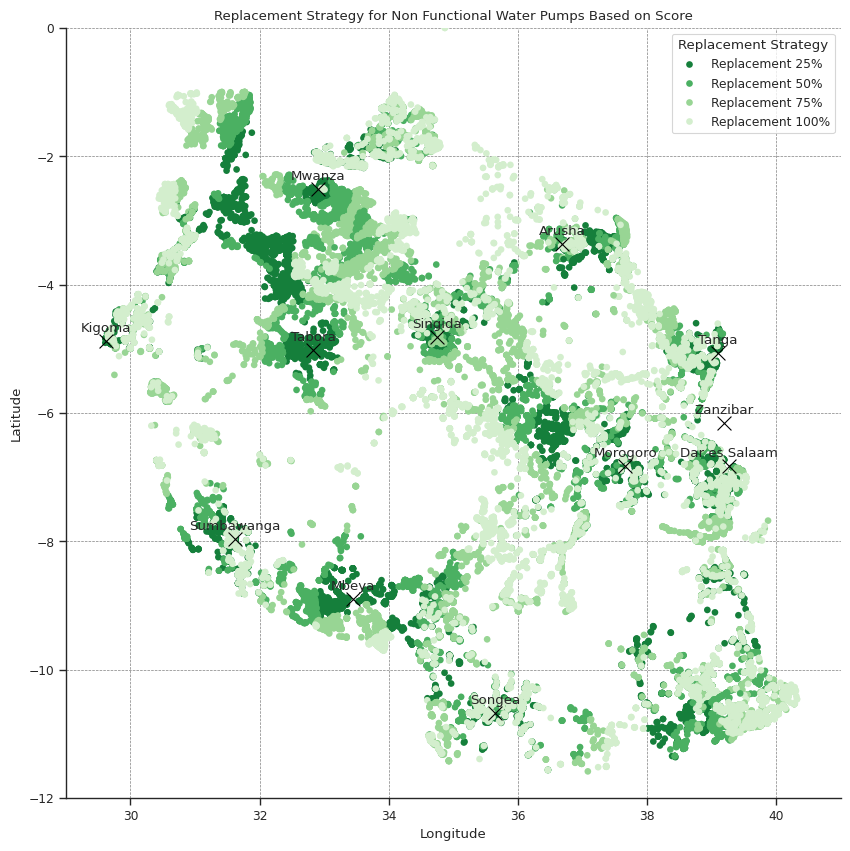

In [148]:
plot_df = sorted_df[
    (sorted_df["status_group"] == "non functional")
    # & (sorted_df["region"] == "Arusha")
]

fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(
    x=plot_df["longitude"],
    y=plot_df["latitude"],
    hue=plot_df["label"],
    # size=plot_df["population"],
    ax=ax,
    palette="Greens_r",
    # alpha=0.5,
    # sizes=(20, 200),
    edgecolor="none",
)
sns.scatterplot(
    x=major_cities["longitude"],
    y=major_cities["latitude"],
    ax=ax,
    color="black",
    marker="x",
    s=100,
)
for i in range(major_cities.shape[0]):
    ax.text(
        major_cities.iloc[i]["longitude"],
        major_cities.iloc[i]["latitude"] + 0.1,
        major_cities.iloc[i]["city"].split(",")[0],
        ha="center",
        va="bottom",
    )
ax.set_xlim(29, 41)
ax.set_ylim(-12, 0)
ax.legend(title="Replacement Strategy", loc="upper right")
ax.set_title("Replacement Strategy for Non Functional Water Pumps Based on Score")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.grid(color="gray", linestyle="--", linewidth=0.5)

# ax.set_xticks([])
# ax.set_yticks([])

In [152]:
major_cities.loc[major_cities.city == "Mwanza"]["city"]

Series([], Name: city, dtype: object)

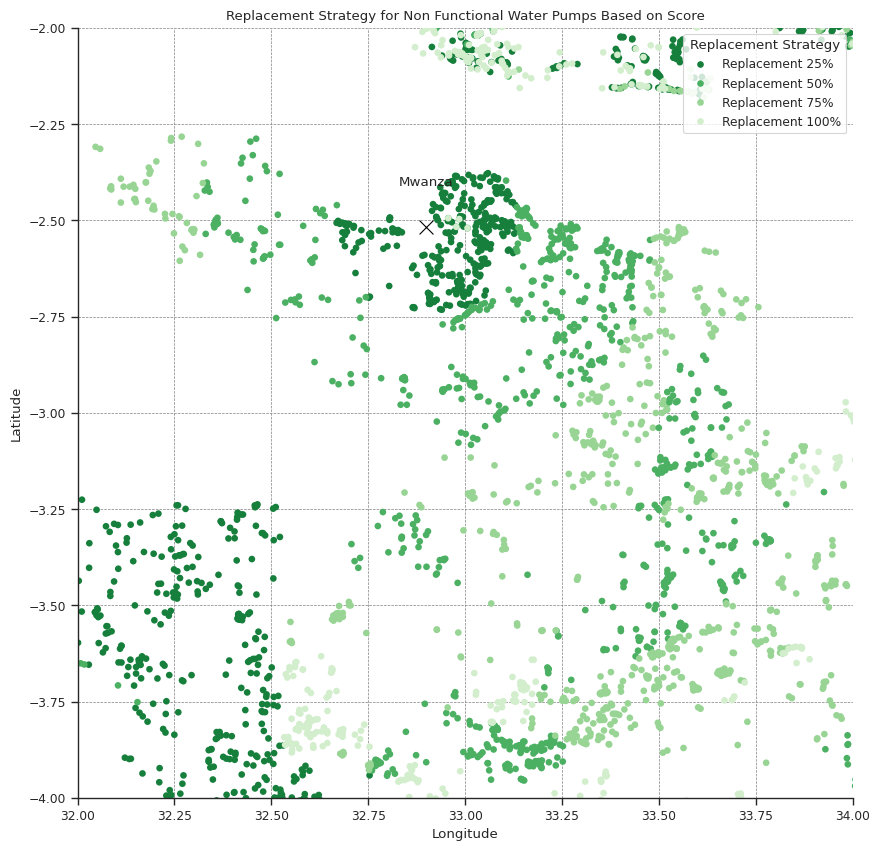

In [156]:
plot_df = sorted_df[
    (sorted_df["status_group"] == "non functional")
    # & (sorted_df["region"] == "Arusha")
]

fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(
    x=plot_df["longitude"],
    y=plot_df["latitude"],
    hue=plot_df["label"],
    # size=plot_df["population"],
    ax=ax,
    palette="Greens_r",
    # alpha=0.5,
    # sizes=(20, 200),
    edgecolor="none",
)
sns.scatterplot(
    x=major_cities["longitude"],
    y=major_cities["latitude"],
    ax=ax,
    color="black",
    marker="x",
    s=100,
)
ax.text(32.9, -2.517 + 0.1, "Mwanza", ha="center", va="bottom")
ax.set_xlim(32, 34)
ax.set_ylim(-4, -2)
ax.legend(title="Replacement Strategy", loc="upper right")
ax.set_title("Replacement Strategy for Non Functional Water Pumps Based on Score")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.grid(color="gray", linestyle="--", linewidth=0.5)

In [168]:
sorted_df

,region,score,population,replacement_cost,travel_time,status_group,latitude,longitude,label
id,,,,,,,,,
24177,Arusha,-93.460368,300,375.0,0.065709,non functional,-3.344786,36.702516,Replacement 25%
9666,Arusha,-93.473302,300,375.0,0.144205,non functional,-3.307242,36.657784,Replacement 25%
41027,Arusha,-93.474341,300,375.0,0.150514,non functional,-3.303260,36.660206,Replacement 25%
54989,Arusha,-93.474853,300,375.0,0.153619,non functional,-3.303177,36.656531,Replacement 25%
15893,Arusha,-93.500349,300,375.0,0.308357,non functional,-3.464983,36.781281,Replacement 25%
...,...,...,...,...,...,...,...,...,...
42696,Tanga,-280.512283,900,1125.0,0.911687,non functional,-5.127567,38.691643,Replacement 100%
43364,Tanga,-280.570393,900,1125.0,1.175201,non functional,-5.749099,38.868949,Replacement 100%
12903,Tanga,-280.589237,900,1125.0,1.260656,non functional,-4.834836,38.580824,Replacement 100%


In [ ]:
sorted_df[(sorted_df.label == "Replacement 25%")].drop(
    columns=["score", "status_group", "label", "latitude", "longitude"]
).groupby("region").sum()

,population,replacement_cost,travel_time
region,,,
Arusha,54742,96375.00,56.368965
Dar es Salaam,22771,38250.00,27.782155
Dodoma,82150,116250.00,873.994330
Iringa,34337,115125.00,738.312622
Kagera,67203,151500.00,1304.646239
Kigoma,50478,88500.00,264.314924
Kilimanjaro,70899,161625.00,639.312326
Lindi,70492,111376.25,1404.429735
Manyara,31492,54000.00,187.236038


In [174]:
region_ranking = {}
for key, val in df[(df["status_group"] == "non functional")].groupby("region")[
    ["score", "population", "replacement_cost", "travel_time"]
]:
    region_ranking[key] = val.sort_values(by="score", ascending=False)

In [179]:
plan_2 = pd.DataFrame(
    {key: val.population.sum() for key, val in region_ranking.items()}, index=[0]
).T.rename(columns={0: "population_unserved"})

replacement = pd.DataFrame(
    {
        "Replacement "
        + str(int(perc * 100))
        + "%": [
            round(
                (
                    val.iloc[: int(len(val) * perc)]["population"].sum()
                    / val.population.sum()
                )
                * 100,
                1,
            )
            for key, val in region_ranking.items()
        ]
        for perc in [0.25, 0.5, 0.75, 0.9]
    },
    index=plan_2.index,
)
plan_2 = pd.concat([plan_2, replacement], axis=1)

In [180]:
plan_2

,population_unserved,Replacement 25%,Replacement 50%,Replacement 75%,Replacement 90%
Arusha,200818,27.3,47.3,62.3,76.4
Dar es Salaam,88488,25.7,43.9,60.6,72.2
Dodoma,269555,30.5,61.0,80.8,92.2
Iringa,181657,18.9,34.0,50.5,65.9
Kagera,226368,29.7,53.1,76.6,90.6
Kigoma,361843,14.0,30.3,58.3,79.8
Kilimanjaro,289726,24.5,48.9,73.1,84.4
Lindi,386640,18.2,35.7,58.9,79.6
Manyara,146391,21.5,40.6,58.5,75.0
Mara,393446,18.7,34.3,55.9,78.2


In [185]:
# cost of replacing water pumps

replacement = pd.DataFrame(
    {
        "Replacement "
        + str(int(perc * 100))
        + "%": [
            (val.iloc[: int(len(val) * perc)]["replacement_cost"].sum())
            for key, val in region_ranking.items()
        ]
        for perc in [0.25, 0.5, 0.75, 0.9]
    },
    index=plan_2.index,
)
replacement

,Replacement 25%,Replacement 50%,Replacement 75%,Replacement 90%
Arusha,96375.00,193125.00,289500.00,348175.00
Dar es Salaam,38250.00,76500.00,114750.00,139367.50
Dodoma,116250.00,232500.00,348750.00,418500.00
Iringa,115125.00,230250.00,345375.00,414375.00
Kagera,151500.00,303375.00,455250.00,546375.00
Kigoma,88500.00,181432.50,307953.75,405293.75
Kilimanjaro,161625.00,323250.00,484875.00,581625.00
Lindi,111376.25,222751.25,347658.75,447930.00
Manyara,54000.00,108000.00,162000.00,198046.25
Mara,108750.00,217500.00,340845.00,450428.75


In [186]:
# traveling time to replace water pumps

replacement = pd.DataFrame(
    {
        "Replacement "
        + str(int(perc * 100))
        + "%": [
            round(val.iloc[: int(len(val) * perc)]["travel_time"].sum())
            for key, val in region_ranking.items()
        ]
        for perc in [0.25, 0.5, 0.75, 0.9]
    },
    index=plan_2.index,
)
replacement

,Replacement 25%,Replacement 50%,Replacement 75%,Replacement 90%
Arusha,56,157,306,671
Dar es Salaam,28,63,108,146
Dodoma,874,2034,2878,3519
Iringa,738,1687,2836,3755
Kagera,1305,2800,4626,5863
Kigoma,264,1083,1763,2099
Kilimanjaro,639,1495,2468,3166
Lindi,1404,3467,5224,6340
Manyara,187,491,883,1137
Mara,643,1670,2668,3234
